In [466]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [467]:
for_pred = pd.read_csv("Data/features_30_sec.csv")
music_data = pd.read_csv("Data/features_3_sec.csv")

music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [468]:
# path = "Data/genres_original/blues/blues.00000.wav"
# plt.figure(figsize=(14,5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='blue')
# print("Blue")

In [469]:
# path = "Data/genres_original/metal/metal.00000.wav"
# plt.figure(figsize=(14, 5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='orange')
# print('Metal')

In [470]:
# path = "Data/genres_original/pop/pop.00000.wav"
# plt.figure(figsize=(14, 5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='purple')
# print('Pop')

In [471]:
# path = "Data/genres_original/hiphop/hiphop.00000.wav"
# plt.figure(figsize=(14, 5))
# data, samplin_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='grey')
# print("Hip-Hop")

In [472]:
# path = "Data/genres_original/country/country.00000.wav"
# plt.figure(figsize=(14, 5))
# data, sampling_rate = librosa.load(path)
# librosa.display.waveshow(data, sr=sampling_rate, color='brown')
# print("Country")

In [473]:
#Computing the correlation matrix
# spike_col = [col for col in music_data.columns if 'mean' in col]
# print(spike_col)

# #Matplotlib Figure
# f, ax = plt.subplots(figsize= (16, 11))

# #Draw the heatmap 
# sns.heatmap(music_data[spike_col].corr(), cmap="YlGn")
# plt.title('Heatmap for MEAN variables', fontsize=20)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)

In [474]:
music_data = music_data.drop(['filename', 'length'], axis = 1)
#Data Preprocessing
label_encode = preprocessing.LabelEncoder()
# class_list = music_data.iloc[:, -1]

X = music_data.iloc[:,:-1]
y = music_data.iloc[:,-1]



#filename column is not relevant, so dropping filename column
# y = label_encode.fit_transform(class_list)
# X = music_data.drop(['label', 'filename', 'length'], axis=1)

#Scaling data to make model more stable and train fast
# cols = X.columns
# minmax = preprocessing.StandardScaler()
# np_scaled = minmax.fit_transform(X)

# #New DataFrame with new Scaled Data
# X = pd.DataFrame(np_scaled, columns = cols)

# X.head()

In [475]:
#Splitting Data into Testing Data & Training Data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

y_train = label_encode.fit_transform(y_train)
y_test = label_encode.transform(y_test)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                   metrics=['accuracy']
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                     batch_size=batch_size)

def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()



model = keras.models.Sequential([
    keras.layers.Dense(256, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(10, activation="softmax"),
    
])




c:\Users\Jadge\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [476]:
#Compiling & Fitting the Model
adam = keras.optimizers.Adam(learning_rate=1e-4)
# model.compile(optimizer=adam, 
#               loss='sparse_categorical_crossentropy', 
#               metrics=['accuracy'])
# hist = model.fit(X_train, y_train, validation_data= (X_test, y_test),
#                 epochs=100,
#                 batch_size=32)

model_history = trainModel(model=model, epochs=100, optimizer='adam')

test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4263 - loss: 1.5781 - val_accuracy: 0.7002 - val_loss: 0.8569
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6849 - loss: 0.9121 - val_accuracy: 0.7583 - val_loss: 0.6974
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7440 - loss: 0.7469 - val_accuracy: 0.7798 - val_loss: 0.6278
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7871 - loss: 0.6399 - val_accuracy: 0.8058 - val_loss: 0.5928
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8076 - loss: 0.5572 - val_accuracy: 0.8273 - val_loss: 0.4799
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8296 - loss: 0.4842 - val_accuracy: 0.8413 - val_loss: 0.4622
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8481 - loss: 0.4356 - val_accuracy: 0.8569 - val_loss: 0.4299
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8683 - loss: 0.3810 - val_accu

In [477]:
#Test Accuracy
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.9290 - loss: 0.3223
Test Accuracy: 0.9339339137077332


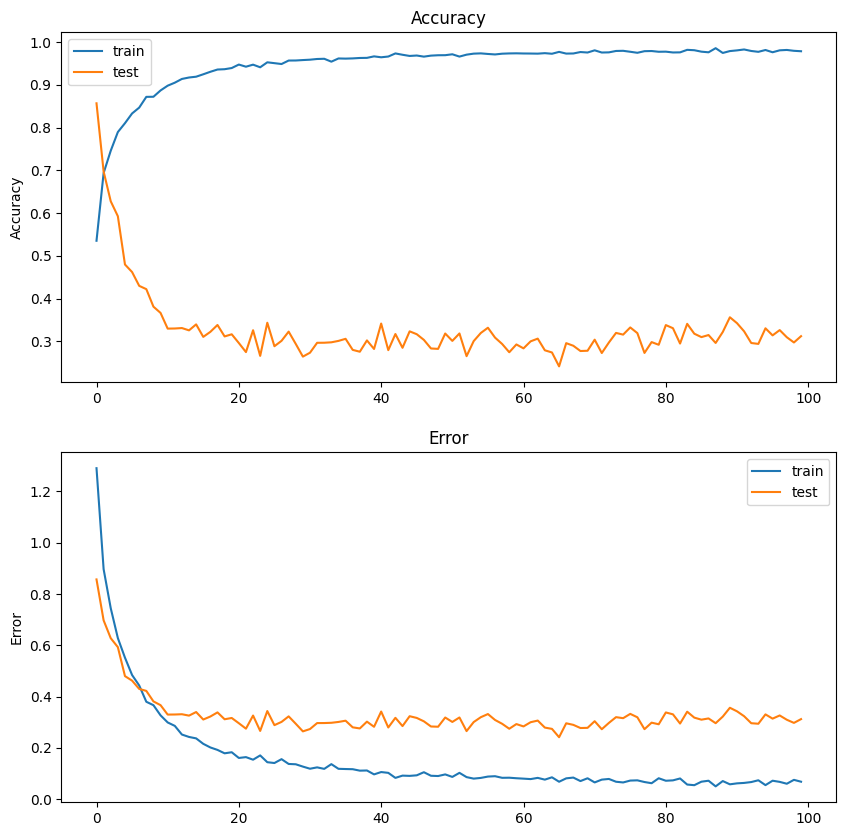

In [478]:
fig, axs = plt.subplots(2, figsize=(10, 10))

#Accuracy
axs[0].plot(model_history.history['accuracy'], label="train")
axs[0].plot(model_history.history['val_loss'], label="test")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].set_title("Accuracy")

#Error
axs[1].plot(model_history.history["loss"], label="train") 
axs[1].plot(model_history.history["val_loss"], label="test")     
axs[1].set_ylabel("Error") 
axs[1].legend() 
axs[1].set_title("Error") 
      
plt.show()

In [479]:
# pr = np.array([0.35008812, 0.088756569, 0.130227923, 0.002826696, 1784.16585, 129774.0645, 2002.44906, 85882.76132, 3805.839606, 
#                901505.4255, 0.083044821, 0.000766946, -4.53E-05, 0.008172282, 7.78E-06, 0.005698182, 123.046875, -113.5706482, 
#                2564.20752, 121.5717926, 295.9138184, -19.16814232, 235.5744324, 42.36642075, 151.1068726, -6.364664078, 167.9347992, 
#                18.62349892, 89.18083954, -13.7048912, 67.66049194, 15.34315014, 68.93257904, -12.27410984, 82.20420074, 10.97657204, 
#                63.38631058, -8.326573372, 61.77309418, 8.803792, 51.24412537, -3.6723001, 41.21741486, 5.7479949, 40.55447769, 
#                -5.162881851, 49.77542114, 0.752740204, 52.42090988, -1.690214634, 36.52407074, -0.408979177, 41.59710312, 
#                -2.303522587, 55.06292343, 1.221290708, 46.93603516]).reshape(1, -1) 
predictions = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [480]:
display(predictions)

array([[3.3462598e-04, 1.9255943e-08, 1.4686140e-07, ..., 1.0285239e-03,
        3.7692178e-03, 3.2649018e-06],
       [5.0852975e-09, 1.3968348e-09, 5.4754690e-10, ..., 2.6393775e-15,
        1.0160483e-11, 1.6133597e-12],
       [1.0000000e+00, 3.6841536e-19, 4.9097004e-08, ..., 9.8913892e-14,
        2.5369623e-11, 2.8760770e-11],
       ...,
       [1.9825872e-09, 3.3118853e-13, 1.2242955e-10, ..., 6.8670477e-07,
        6.3680545e-07, 6.5973677e-10],
       [4.3538367e-12, 4.3929921e-16, 3.7210329e-11, ..., 5.4210330e-12,
        2.4996207e-09, 1.1118364e-10],
       [2.4635426e-14, 2.0707779e-15, 7.4802863e-17, ..., 4.5960496e-13,
        1.0000000e+00, 5.1518075e-14]], dtype=float32)

In [481]:
predicts = pd.DataFrame(predictions)
predicts.columns = list(set(y_test))
predict = []
for pred in predictions:
    predict.append(np.argmax(pred))

predicts['Label'] = predict

In [482]:
predicts['Real'] = list(y_test.copy())
pd.set_option('display.max_columns', None)
print(predicts)

                 0             1             2             3             4  \
0     3.346260e-04  1.925594e-08  1.468614e-07  2.270817e-05  9.947889e-01   
1     5.085298e-09  1.396835e-09  5.475469e-10  1.422795e-15  3.295636e-17   
2     1.000000e+00  3.684154e-19  4.909700e-08  5.111038e-12  6.862708e-14   
3     9.995739e-01  1.541504e-09  4.099444e-04  1.854908e-06  9.023514e-08   
4     5.326182e-02  7.234561e-03  5.140029e-02  3.118811e-01  2.848149e-02   
...            ...           ...           ...           ...           ...   
1993  3.422474e-07  3.250552e-06  6.672343e-05  1.046393e-04  8.791040e-06   
1994  1.453749e-14  1.107110e-15  3.348787e-17  2.587071e-17  2.340633e-09   
1995  1.982587e-09  3.311885e-13  1.224296e-10  3.520486e-06  9.999952e-01   
1996  4.353837e-12  4.392992e-16  3.721033e-11  1.000000e+00  2.925079e-09   
1997  2.463543e-14  2.070778e-15  7.480286e-17  5.534187e-16  1.538374e-10   

                 5             6             7             8   

In [483]:
display(predicts['Label'], predicts['Real'])

0       4
1       5
2       0
3       0
4       3
       ..
1993    7
1994    7
1995    4
1996    3
1997    8
Name: Label, Length: 1998, dtype: int64

0       4
1       5
2       0
3       0
4       6
       ..
1993    7
1994    7
1995    4
1996    3
1997    8
Name: Real, Length: 1998, dtype: int32

In [484]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix = confusion_matrix(list(y_test.copy()),predict)

In [485]:
display(list(set(y_test)))





[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

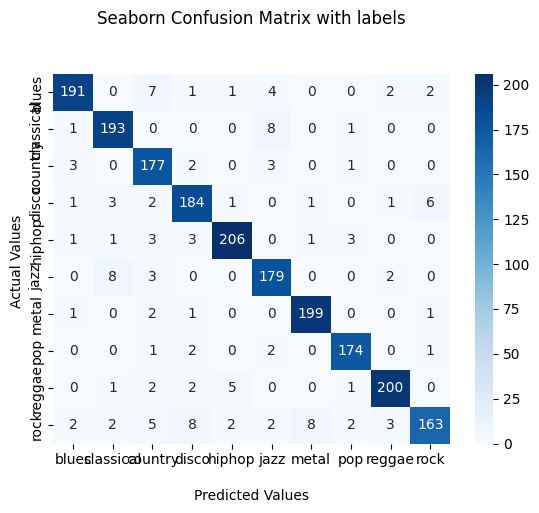

In [486]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='d')

ax.set_title('Seaborn Confusion Matrix with labels\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([
 'blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock'
 ])
ax.yaxis.set_ticklabels([
 'blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock'
 ])

## Display the visualization of the Confusion Matrix.
plt.show()

In [487]:
model.save('genre_model.h5')

In [488]:
import pickle
with open('music_genre_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)